## Object detection using co-occurance feature 

In [4]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt


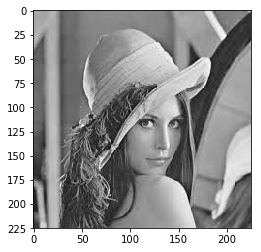

In [5]:
img_gray = cv2.imread('Lina.jpg',0)
plt.imshow(img_gray,cmap='gray')
[row,col] = img_gray.shape


In [6]:
def get_LBP(img):
    
    
        [row,col] = img.shape
        LBP_feature = np.zeros((row,col),dtype='uint8')
        
        for i in range(1,row-1):
        
            for j in range(1,col-1):
                window1 = np.zeros((3,3),dtype='int')
                center_pix = img[i,j]
                window  = img[i-1:i+2,j-1:j+2]
                window1[window > center_pix] =1
                value = int(str(window1[0,0])+str(window1[0,1])+str(window1[0,2])+ str(window1[1,2])+str(window1[2,2])+str(window1[2,1])+str(window1[2,0])+str(window1[1,0]), 2)
                LBP_feature[i,j] = value
                
                
        return LBP_feature 

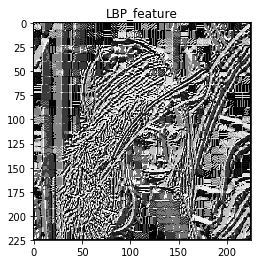

In [7]:
Lbp_feature = get_LBP(img_gray)
plt.imshow(Lbp_feature,cmap='gray')
plt.title("LBP_feature")

In [8]:
def get_hog(img):
    
    (row,col) = img.shape
    img_x = np.zeros((row,col),dtype='double')
    img_y = np.zeros((row,col),dtype='double')
    
    img_mag  = np.zeros((row,col),dtype='double')
    img_arc  = np.zeros((row,col),dtype='double')
    for i in range(1,row-1):
        for j in range(1,col-1):
            
            img_x[i,j] = abs(np.double(img[i-1,j]) - np.double(img[i+1,j]))
            img_y[i,j] = abs(np.double(img[i,j-1]) - np.double(img[i,j+1]))
    

#    img_x = np.asarray(img_x,dtype ='double')
#    img_y = np.asarray(img_y,dtype ='double')  
    
    img_mag = np.sqrt(np.multiply(img_x,img_x) + np.multiply(img_y,img_y))
    img_arc = np.round(180*np.arctan((img_y)/(img_x))/np.pi)
#    
#    for i in range(0,row-8,8):
#        
#        for j in range(0,col-8,8):
#            ## 8 x 8 cell of image 
#            mag_patch = img_mag[i:i+8,j:j+8]
#            grad_patch = img_grad[i:i+8,j:j+8]
#            ## 9 bin hog features 
#            hog_feature_patch = np.zeros((1,9),dtype='int')
#            for n in range(0,7):
#                for m in range(0,7):
#                    if(~np.isnan(grad_patch[n,m])):
#                        angel_location, mag_ratio= divmod(round(grad_patch[n,m]), 20)
#                        value = mag_patch[n,m]
#                        
#                        ## if angle is greater than 160 degree make next location 0 degree  
#                        if (angel_location+1 > 8):
#                            hog_feature_patch[0,0] = hog_feature_patch[0,0] + value*mag_ratio/20.0
#                        else:
#                            hog_feature_patch[0,angel_location+1] = hog_feature_patch[0,angel_location+1] + value*mag_ratio/20.0
#                            
#                        hog_feature_patch[0,angel_location] = hog_feature_patch[0,angel_location] + value - value*mag_ratio/20.0
                        
                
                
    
    return img_arc,img_x,img_y

C:\Users\pardhan\Anaconda2\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in divide
C:\Users\pardhan\Anaconda2\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in divide
C:\Users\pardhan\Anaconda2\lib\site-packages\numpy\core\fromnumeric.py:57: RuntimeWarning: invalid value encountered in rint
  return getattr(obj, method)(*args, **kwds)


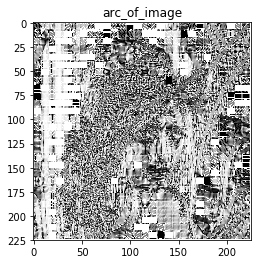

In [9]:
img_arc,img_x,img_y = get_hog(img_gray)



############################################################################################
## 9 bin hog features

B = img_arc.astype(float) - (np.min(np.min(img_arc, axis=1), axis=0)).astype(float)
#    
B = (B/np.max(np.max(B, axis=1), axis=0)).astype(float)   
#    
ch = (np.round(255*B)).astype('uint8')
plt.imshow(img_arc,cmap='gray')
plt.title("arc_of_image")





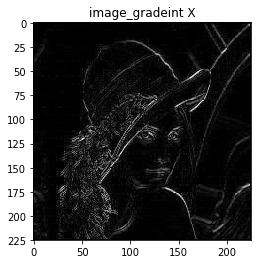

In [10]:
plt.imshow(img_x,cmap='gray')
plt.title("image_gradeint X")

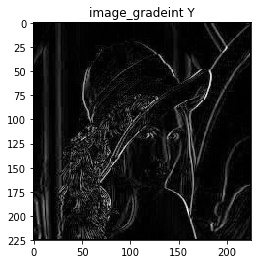

In [11]:
plt.imshow(img_y,cmap='gray')
plt.title("image_gradeint Y")

In [12]:
def get_haar(img):
    
    weights = [1,1,-1,-1,1,1,-1,-1,-1,-1,1,1,-1,-1,1,1]
    weights  = np.array(weights)
    
    weights = np.reshape(weights,(4,4))
    (row,col) = img.shape
    img = np.asarray(img,dtype ='double')
    img_haar = np.zeros((row,col),dtype='double')
    for i in range(row-4):
        for j in range(col-4):
            
            window = img[i:i+4,j:j+4]
            
            img_haar[i,j] = sum(sum(np.multiply(window,weights)))
    
    B = img_haar.astype(float) - (np.min(np.min(img_haar, axis=1), axis=0)).astype(float)
#    
    B = (B/np.max(np.max(B, axis=1), axis=0)).astype(float)   
#    
    ch = (np.round(255*B)).astype('uint8')
    return ch

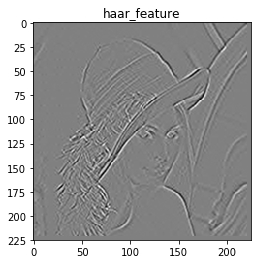

In [13]:
haar_feature = get_haar(img_gray)


plt.imshow(haar_feature,cmap='gray')
plt.title("haar_feature")

In [14]:
#calculate coocuurance matrix of n bin and d distance

def co_occurance_feature(img,level,d):
    
    # initilize the matrix 
    
    co_feature = np.zeros((level,level),dtype='int')
    
    [row,col] = img.shape
    
    
    for i in range(0,row):
        
        for j in range(0,col):
            
            
            pixel_value1 = img[i,j]
            
            if(~np.isnan(img[i,j])):
            
            ## taking care boundary condition
                if(j+d < col):
                    
                    if(~np.isnan(img[i,j+d])):
                    
                    
                        pixel_value2 = img[i,j+d]

                        ## take the location according to bin
                        ## level -1 is taking care the zero indexing 
                        loc1 = round((level-1)*(pixel_value1/256.0))

                        loc2 = round((level-1)*(pixel_value2/256.0))

                        co_feature[loc1,loc2] = co_feature[loc1,loc2] +1 
                
    
    return co_feature

In [15]:
co_feature = co_occurance_feature(img_gray,8,1)


plt.matshow(co_feature)
plt.show()

#plt.imshow(ch,cmap='gray')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [16]:
def get_feature(img_gray):
    
    ## get arc feature and gradient image
    img_hog_I,img_x,img_y = get_hog(img_gray)
    img_hog_X,_,_ = get_hog(img_x)
    img_hog_Y,_,_ = get_hog(img_y)
    img_LBP_I = get_LBP(img_gray)
    img_LBP_X = get_LBP(img_x)
    img_LBP_Y = get_LBP(img_y)
    img_haar_I = get_haar(img_gray)
    img_haar_X = get_haar(img_x)
    img_haar_Y = get_haar(img_y)
    
    #plt.imshow(img_haar_I,cmap='gray')
    #plt.title("haar_feature")
    #plt.imshow(img_haar_X,cmap='gray')
    #plt.title("haar_feature_X")
    
    
    ### apply the co-occurance of 9 bin in HOG features and 8 bins in LBP and haar features for distance 4
    
    img_hog_I_C = co_occurance_feature(img_hog_I,9,4)
    #print("shape of hog co-occurance feature", img_hog_I_C.shape)
    img_hog_I_C = img_hog_I_C.flatten()
    
    
    img_hog_X_C = co_occurance_feature(img_hog_X,9,4)
    img_hog_X_C = img_hog_X_C.flatten()
    
    img_hog_Y_C = co_occurance_feature(img_hog_Y,9,4)
    img_hog_Y_C = img_hog_Y_C.flatten()
    
 ###################################################################################################################
    img_LBP_I_C = co_occurance_feature(img_LBP_I,8,4)
    #print("shape of LBP co-occurance feature", img_LBP_I_C.shape)
    img_LBP_I_C = img_LBP_I_C.flatten()
    
    
    img_LBP_X_C = co_occurance_feature(img_LBP_X,8,4)
    img_LBP_X_C = img_LBP_X_C.flatten()
    
    img_LBP_Y_C = co_occurance_feature(img_LBP_Y,8,4)
    img_LBP_Y_C = img_LBP_Y_C.flatten()
  ###################################################################################################################
    img_haar_I_C = co_occurance_feature(img_haar_I,8,1)
    #print("shape of haar co-occurance feature", img_haar_I_C.shape)
    #img_haar_I_C = img_haar_I_C.flatten()
    img_haar_I_C = np.reshape(img_haar_I_C,(1,64))
    
    img_haar_X_C = co_occurance_feature(img_haar_X,8,4)
    img_haar_X_C = img_haar_X_C.flatten()
    
    img_haar_Y_C = co_occurance_feature(img_haar_Y,8,4)
    img_haar_Y_C = img_haar_Y_C.flatten()
    
    
    #feature = np.append(img_hog_I_C, img_hog_X_C,img_hog_Y_C)#, img_LBP_I_C)# img_LBP_X_C img_LBP_Y_C img_haar_I_C img_haar_X_C img_haar_Y_C]
    feature1 = np.append(img_hog_I_C, img_hog_X_C)
    feature2  = np.append(img_hog_Y_C, img_LBP_I_C)
    feature3 = np.append(img_LBP_X_C, img_hog_Y_C)
    feature4 = np.append(img_haar_I_C, img_haar_X_C)
    
    feature5 = np.append(feature1, feature2)
    feature6 = np.append(feature3, feature4)
    feature7 = np.append(feature5, feature6)
    feature = np.append(feature7, img_haar_Y_C)
    
    #print ("shape of feature is" ,feature.shape)
    #feature =  feature.flatten()
    #return np.reshape(feature,(1,644))
    return feature


In [17]:
feature = get_feature(img_gray)
print ("shape of feature is" ,feature.shape)

C:\Users\pardhan\Anaconda2\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in divide
C:\Users\pardhan\Anaconda2\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in divide


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
import glob

In [ ]:

path_pos = 'Train/pos/*png'
path_neg = 'Train/neg/*png'



list_neg = sorted(glob.glob(path_neg))



In [18]:
def generate_features(path_pos):
    list_pos = sorted(glob.glob(path_pos))
    pos_feature = []
    for img_pos in list_pos:
        #print img_pos
        img_gray = cv2.imread(img_pos,0)
        img_gray = cv2.resize(img_gray,(128,64))
        feature = get_feature(img_gray)
        pos_feature.append(feature)
    return np.asarray(pos_feature)
#print pos_feature.shape

In [19]:
pos_feature = generate_features(path_pos)


print pos_feature.shape

NameError: name 'path_pos' is not defined

In [20]:
neg_feature = generate_features(path_neg)
print neg_feature.shape

NameError: name 'path_neg' is not defined

In [21]:
pos_label = np.ones(pos_feature.shape[0])
neg_label = -np.ones(neg_feature.shape[0])
#print neg_label

NameError: name 'pos_feature' is not defined

In [51]:
import random
X_train1 = np.concatenate((pos_feature, neg_feature), axis=0)
Y_train1 = np.concatenate((pos_label, neg_label), axis=0)
#print X_train.shape

X_train1 = np.asarray(X_train1,dtype ='double')
Y_train1 = np.asarray(Y_train1,dtype ='double')

## shuffel the data 
## incude Y label alos

#Data = np.asarray(Data,dtype ='double')

#print(Data.shape)
#np.random.shuffle(arr)

In [34]:
### need to redomize 

In [52]:
#import pickle

#
#with open('features.pickle', 'w') as f:  # Python 3: open(..., 'wb')
    pickle.dump([X_train1, Y_train1], f)

In [53]:
with open('features.pickle') as f:  # Python 3: open(..., 'rb')
    X_train1,Y_train1 = pickle.load(f)

In [54]:
Data = np.zeros((X_train1.shape[0],X_train1.shape[1]+1),dtype = 'double')
Data[:,0:644] = X_train1
Data[:,644] = Y_train1
random.shuffle(Data)
X_train1 = Data[:,0:X_train1.shape[1]]
Y_train1 = Data[:,-1]

print Data[:,0:645]

[[  1.80100000e+03   8.16000000e+02   3.62000000e+02 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]
 [  1.80100000e+03   8.16000000e+02   3.62000000e+02 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]
 [  1.80100000e+03   8.02000000e+02   3.63000000e+02 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]
 ..., 
 [  3.05000000e+03   5.47000000e+02   2.97000000e+02 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]
 [  1.61900000e+03   8.35000000e+02   4.03000000e+02 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]
 [  1.04100000e+03   7.44000000e+02   3.86000000e+02 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]


In [55]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.datasets import make_hastie_10_2

def get_error_rate(pred, Y):
    return sum(pred != Y) / float(len(Y))

""" Funtion for error rate"""
def print_error_rate(err):
    print 'Error rate: Training: %.4f - Test: %.4f' % err

"""Function for classifier"""
def generic_clf(Y_train, X_train, Y_test, X_test, clf):
    clf.fit(X_train,Y_train)
    pred_train = clf.predict(X_train)
    pred_test = clf.predict(X_test)
    return get_error_rate(pred_train, Y_train), \
           get_error_rate(pred_test, Y_test)
    
"""Function for adaboost algorithm"""
def adaboost_clf(Y_train, X_train, Y_test, X_test, M, clf):
    n_train, n_test = len(X_train), len(X_test)
    # Initialize weights
    w = np.ones(n_train) / n_train
    
    #print ( 'Weight', w)
    pred_train, pred_test = [np.zeros(n_train), np.zeros(n_test)]

    for i in range(M):
        # Fit a classifier with the specific weights
        clf.fit(X_train, Y_train, sample_weight = w)
        pred_train_i = clf.predict(X_train)
        pred_test_i = clf.predict(X_test)
        # Indicator function
        miss = [int(x) for x in (pred_train_i != Y_train)]
        # Equivalent with 1/-1 to update weights
        miss2 = [x if x==1 else -1 for x in miss]
        # Error
        #print ('miss',miss)
        
        err_m = np.dot(w,miss) / sum(w)
        
        # Alpha
        if(err_m <0.000000001):
            err_m =0.000001 
        #print ('error',err_m)
        alpha_m = 0.5 * np.log( (1 - err_m) / float(err_m))
        
        
        #print ("alpha is" , alpha_m)
        # New weights
        w = np.multiply(w, np.exp([float(x) * alpha_m for x in miss2]))
        #clf_list.append(clf)
        # Add to prediction
        pred_train = [sum(x) for x in zip(pred_train, 
                                          [x * alpha_m for x in pred_train_i])]
        pred_test = [sum(x) for x in zip(pred_test, 
                                         [x * alpha_m for x in pred_test_i])]
    
    pred_train, pred_test = np.sign(pred_train), np.sign(pred_test)
    # Return error rate in train and test set
    return get_error_rate(pred_train, Y_train), \
           get_error_rate(pred_test, Y_test)
   
"""Function for plot"""
def plot_error_rate(er_train, er_test):
    df_error = pd.DataFrame([er_train, er_test]).T
    df_error.columns = ['Training', 'Test']
    plot1 = df_error.plot(linewidth = 3, figsize = (8,6),
            color = ['lightblue', 'darkblue'], grid = True)
    plot1.set_xlabel('Number of iterations', fontsize = 12)
    plot1.set_xticklabels(range(0,450,50))
    plot1.set_ylabel('Error rate', fontsize = 12)
    plot1.set_title('Error rate vs number of iterations', fontsize = 16)
    plt.axhline(y=er_test[0], linewidth=1, color = 'red', ls = 'dashed')

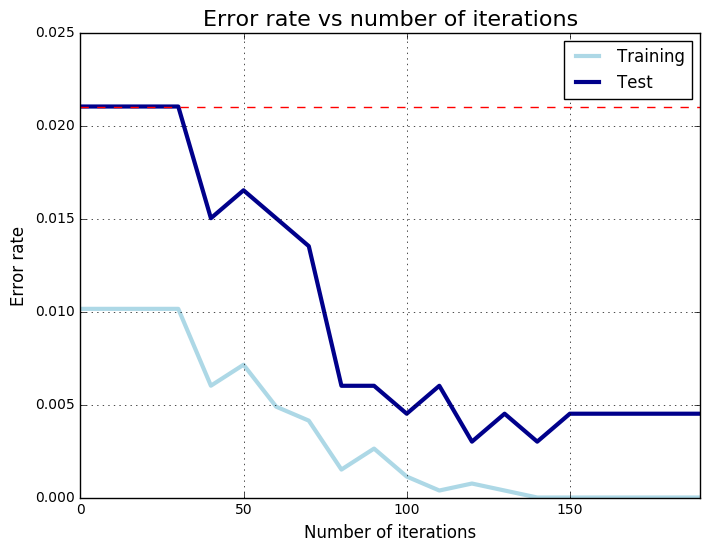

In [59]:
df = pd.DataFrame(X_train1)
df['Y'] = Y_train1
# Training and test set
train, test = train_test_split(df, test_size = 0.2)
X_train, Y_train = train.iloc[:,:-1], train.iloc[:,-1]
X_test, Y_test = test.iloc[:,:-1], test.iloc[:,-1]

#print X_test
    # Decision tree 
clf_tree = DecisionTreeClassifier(max_depth = 1, random_state = 1)
er_tree = generic_clf(Y_train, X_train, Y_test, X_test, clf_tree)
    
    # Adaboost classifier using a decision tree as base estimator
    # Test with different number of iterations
er_train, er_test = [er_tree[0]], [er_tree[1]]
x_range = range(1, 20, 1)

for i in x_range:
    
    er_i = adaboost_clf(Y_train, X_train, Y_test, X_test, i, clf_tree)
    er_train.append(er_i[0])
    er_test.append(er_i[1])
plot_error_rate(er_train, er_test)